In [6]:
import pandas as pd
import seaborn as sns

# Data analysis

## Data description

Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

## Import Data

In [3]:
df = pd.read_csv("../raw_data/full_df.csv")

In [15]:
df.shape

(6392, 19)

In [31]:
df.tail()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
6391,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_left.jpg


In [4]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
df.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

Do we have more than one file in the column "filename" ?

In [27]:
for i,filename in enumerate(df.filename):
    if len(df.loc[i,['filename']][0]) > 14:
        print(i, filename)

$\rightarrow$ There is not more than 1 filename present in the column. Is this eye responsible of the disease(s) ?

In [89]:
df.isna().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

## Frequency of each disease

What is the proportion of each disease ?

In [11]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


How many patients have two diseases ?

In [30]:
targets = df[['N','D','G','C','A','H', 'M', 'O']]
perc_two_diseases = len(df[targets.sum(axis=1) > 1])/len(df)
perc_two_diseases

0.15660200250312892

## Separate left and right eyes by keyword

In [57]:
 df['Left-Diagnostic Keywords'].unique()

array(['cataract', 'normal fundus',
       'laser spot，moderate non proliferative retinopathy',
       'macular epiretinal membrane',
       'moderate non proliferative retinopathy', 'drusen',
       'epiretinal membrane',
       'moderate non proliferative retinopathy，hypertensive retinopathy',
       'pathological myopia', 'mild nonproliferative retinopathy',
       'hypertensive retinopathy',
       'macular epiretinal membrane，mild nonproliferative retinopathy',
       'macular hole', 'wet age-related macular degeneration',
       'moderate non proliferative retinopathy，laser spot',
       'moderate non proliferative retinopathy，myelinated nerve fibers',
       'dry age-related macular degeneration',
       'epiretinal membrane，myelinated nerve fibers',
       'diabetic retinopathy', 'epiretinal membrane，lens dust', 'atrophy',
       'laser spot，white vessel，moderate non proliferative retinopathy',
       'chorioretinal atrophy',
       'moderate non proliferative retinopathy，catar

### Normal

In [125]:
boollist_left = []
boollist_right = []
for keyword_left, keyword_right in zip(df['Left-Diagnostic Keywords'],df['Right-Diagnostic Keywords']) :
    boollist_left.append('normal fundus' in keyword_left and not ('epiretinal membrane') in keyword_left)
    boollist_right.append('normal fundus' in keyword_right and not ('epiretinal membrane') in keyword_right)

In [126]:
boollist_tot = [elem1 and elem2 for elem1, elem2 in zip(boollist_left,boollist_right)]

In [131]:
(df[boollist_tot]['N'] == 0).sum()

0

In [133]:
df[[not elem for elem in boollist_tot]][df[[not elem for elem in boollist_tot]]['N'] == 1]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
2854,4290,51,Male,4290_left.jpg,4290_right.jpg,low image quality,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4290_right.jpg


In [134]:
boollist_left = []
boollist_right = []
for keyword_left, keyword_right in zip(df['Left-Diagnostic Keywords'],df['Right-Diagnostic Keywords']) :
    boollist_left.append('low image quality' in keyword_left)
    boollist_right.append('low image quality' in keyword_right)

In [137]:
boollist_tot = [elem1 or elem2 for elem1, elem2 in zip(boollist_left,boollist_right)]

In [139]:
len(df[boollist_tot])

18

### Diabetes

In [75]:
boollist_left = []
boollist_right = []
for keyword_left, keyword_right in zip(df['Left-Diagnostic Keywords'],df['Right-Diagnostic Keywords']) :
    boollist_left.append(('proliferative retinopathy' in keyword_left) or ('diabetic' in keyword_left))
    boollist_right.append(('proliferative retinopathy' in keyword_right) or ('diabetic' in keyword_right))

In [78]:
boollist_tot = [elem1 or elem2 for elem1, elem2 in zip(boollist_left,boollist_right)]


In [79]:
(df[boollist_tot]['D'] == 0).sum()

0

In [80]:
(df[[not elem for elem in (boollist_tot)]]['D'] == 1).sum()

0

   ### Glaucoma

In [142]:
(df['G'] == 1).sum()

397

In [143]:
boollist_left = []
boollist_right = []
for keyword_left, keyword_right in zip(df['Left-Diagnostic Keywords'],df['Right-Diagnostic Keywords']) :
    boollist_left.append('glaucoma' in keyword_left)
    boollist_right.append('glaucoma' in keyword_right)

In [144]:
boollist_tot = [elem1 or elem2 for elem1, elem2 in zip(boollist_left,boollist_right)]

In [146]:
(df[boollist_tot]['G'] == 0).sum()

0

In [148]:
len(df[boollist_tot])

397

In [147]:
(df[[not elem for elem in (boollist_tot)]]['G'] == 1).sum()

0

### Cataract

In [149]:
(df['C'] == 1).sum()

402

In [150]:
boollist_left = []
boollist_right = []
for keyword_left, keyword_right in zip(df['Left-Diagnostic Keywords'],df['Right-Diagnostic Keywords']) :
    boollist_left.append('cataract' in keyword_left)
    boollist_right.append('cataract' in keyword_right)

In [151]:
boollist_tot = [elem1 or elem2 for elem1, elem2 in zip(boollist_left,boollist_right)]

In [152]:
(df[boollist_tot]['C'] == 0).sum()

0

In [153]:
len(df[boollist_tot])

402

In [155]:
(df[[not elem for elem in (boollist_tot)]]['C'] == 1).sum()

0

### Age related Macular Degeneration

In [403]:
(df['A'] == 1).sum()

319

In [407]:
boollist_left = []
boollist_right = []
for keyword_left, keyword_right in zip(df['Left-Diagnostic Keywords'],df['Right-Diagnostic Keywords']) :
    boollist_left.append('age-' in keyword_left)
    boollist_right.append('age-' in keyword_right)

In [408]:
boollist_tot = [elem1 or elem2 for elem1, elem2 in zip(boollist_left,boollist_right)]

In [410]:
(df[boollist_tot]['A'] == 1).sum()

319

In [411]:
(df[[not elem for elem in (boollist_tot)]]['A'] == 1).sum()

0

### Other

In [258]:
boollist_left = []
boollist_right = []
for keyword_left, keyword_right in zip(df['Left-Diagnostic Keywords'],df['Right-Diagnostic Keywords']) :
    boollist_left.append('laser' in keyword_left 
                         or 'lens' in keyword_left 
                         or 'macular' in keyword_left 
                         or 'vitreous' in keyword_left 
                         #or 'drusen' in keyword_left 
                         or 'abnormal' in keyword_left
                         or 'epiretinal membrane' in keyword_left
                         or 'myelinated nerve fibers' in keyword_left 
                         or 'refractive' in keyword_left 
                         or 'maculopathy' in keyword_left) 
                         #or 'atroph' in keyword_left 
                         #or 'hemorrhage' in keyword_left 
                         #or 'occlusion' in keyword_left 
                         #or 'pigment' in keyword_left 
                         #or 'spot' in keyword_left)
    boollist_right.append('laser' in keyword_right 
                          or 'lens' in keyword_right 
                          or 'macular' in keyword_right 
                          or 'vitreous' in keyword_right 
                          #or 'drusen' in keyword_right 
                          or 'abnormal' in keyword_right 
                          or 'epiretinal membrane' in keyword_right 
                          or 'myelinated nerve fibers' in keyword_right
                          or 'refractive' in keyword_right
                          or 'maculopathy' in keyword_right)
                          #or 'atroph' in keyword_right   
                          #or 'hemorrhage' in keyword_right
                          #or 'occlusion' in keyword_right 
                          #or 'pigment' in keyword_right 
                          #or 'spot' in keyword_right )
    

In [259]:
boollist_tot = [elem1 or elem2 for elem1, elem2 in zip(boollist_left,boollist_right)]

In [265]:
import numpy as np

In [266]:
df[~np.array(boollist_tot)][df[~np.array(boollist_tot)]['O'] == 1]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
15,17,57,Male,17_left.jpg,17_right.jpg,drusen,drusen,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",17_right.jpg
28,34,61,Male,34_left.jpg,34_right.jpg,drusen,drusen,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",34_right.jpg
54,66,62,Male,66_left.jpg,66_right.jpg,atrophy,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",66_right.jpg
61,75,68,Male,75_left.jpg,75_right.jpg,drusen,drusen,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",75_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,1731,72,Female,1731_left.jpg,1731_right.jpg,pathological myopia,moderate non proliferative retinopathy，tessell...,0,1,0,0,0,0,1,1,../input/ocular-disease-recognition-odir5k/ODI...,['M'],"[0, 0, 0, 0, 0, 0, 1, 0]",1731_left.jpg
4551,2048,63,Male,2048_left.jpg,2048_right.jpg,hypertensive retinopathy,glaucoma，old central retinal vein occlusion,0,0,1,0,0,1,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",2048_left.jpg
4608,2145,73,Female,2145_left.jpg,2145_right.jpg,cataract,drusen,0,0,0,1,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2145_left.jpg
4647,2185,72,Female,2185_left.jpg,2185_right.jpg,cataract,drusen,0,0,0,1,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2185_left.jpg


### Labelling

In [412]:
labels_left = [[] for i in df['Left-Diagnostic Keywords']]
for i,keyword in enumerate(df['Left-Diagnostic Keywords']):
    labels_left[i] = ''
    if 'normal fundus' in keyword and not 'epiretinal membrane' in keyword:
        labels_left[i] = labels_left[i] + 'N'
    if 'cataract' in keyword:
        labels_left[i] = labels_left[i] +'C'
    if 'proliferative retinopathy' in keyword:
        labels_left[i] = labels_left[i] + 'D'
    if 'diabetic' in keyword:
        labels_left[i] = labels_left[i] + 'D'
    if 'glaucoma' in keyword:
        labels_left[i] = labels_left[i] + 'G'
    if 'hypertensive' in keyword: #See Joao's notebook
        labels_left[i] = labels_left[i] + 'H'
    if 'myopia' in keyword: #See Joao's notebook
        labels_left[i] = labels_left[i] + 'M'
    if 'myopic' in keyword:
        labels_left[i] = labels_left[i] + 'M'
    if 'age-' in keyword:
        labels_left[i] = labels_left[i] + 'A'
    if labels_left[i] == '':
        labels_left[i] = labels_left[i] + 'O'
        

In [413]:
labels_right = [[] for i in df['Right-Diagnostic Keywords']]
for i,keyword in enumerate(df['Right-Diagnostic Keywords']):
    labels_right[i] = ''
    if 'normal fundus' in keyword and not 'epiretinal membrane' in keyword:
        labels_right[i] = labels_right[i] + 'N'
    if 'cataract' in keyword:
        labels_right[i] = labels_right[i] +'C'
    if 'proliferative retinopathy' in keyword:
        labels_right[i] = labels_right[i] + 'D'
    if 'diabetic' in keyword:
        labels_right[i] = labels_right[i] + 'D'
    if 'glaucoma' in keyword:
        labels_right[i] = labels_right[i] + 'G'
    if 'hypertensive' in keyword: #See Joao's notebook
        labels_right[i] = labels_right[i] + 'H'
    if 'myopia' in keyword: #See Joao's notebook
        labels_right[i] = labels_right[i] + 'M'
    if 'myopic' in keyword:
        labels_right[i] = labels_right[i] + 'M'
    if 'age-' in keyword:
        labels_right[i] = labels_right[i] + 'A'
    if labels_right[i] == '':
        labels_right[i] = labels_right[i] + 'O'

In [414]:
df['labels_right'] = labels_right
df['labels_left'] = labels_left

In [415]:
(np.array([len(label) for label in df.labels_left]) > 1).sum()

173

With these labels, we didn't identify those that had one of the 7 diseases + other. therefore, we will analyze the data to see if how much represents the eyes that have more than one description.

## Double description

In [416]:
diagnostics = []
for descriptions in df['Right-Diagnostic Keywords']:
    diagnostics.append(descriptions.split("，"))

In [417]:
diagnostics

[['normal fundus'],
 ['normal fundus'],
 ['moderate non proliferative retinopathy'],
 ['mild nonproliferative retinopathy'],
 ['moderate non proliferative retinopathy'],
 ['moderate non proliferative retinopathy', 'epiretinal membrane'],
 ['mild nonproliferative retinopathy'],
 ['normal fundus'],
 ['vitreous degeneration'],
 ['normal fundus'],
 ['moderate non proliferative retinopathy', 'hypertensive retinopathy'],
 ['pathological myopia'],
 ['macular epiretinal membrane'],
 ['myelinated nerve fibers'],
 ['pathological myopia'],
 ['drusen'],
 ['pathological myopia'],
 ['mild nonproliferative retinopathy'],
 ['epiretinal membrane'],
 ['hypertensive retinopathy'],
 ['cataract'],
 ['moderate non proliferative retinopathy', 'abnormal pigment '],
 ['macular epiretinal membrane', 'moderate non proliferative retinopathy'],
 ['hypertensive retinopathy'],
 ['normal fundus'],
 ['normal fundus'],
 ['hypertensive retinopathy'],
 ['macular epiretinal membrane'],
 ['drusen'],
 ['normal fundus'],
 ['

In [418]:
indexes_right_two_desc = []
for i,diagnostic in enumerate(diagnostics):
    if len(diagnostic) > 1:
        indexes_right_two_desc.append(i)

In [419]:
len(indexes_right_two_desc)

584

In [420]:
diagnostics = []
for descriptions in df['Left-Diagnostic Keywords']:
    diagnostics.append(descriptions.split("，"))

In [421]:
indexes_left_two_desc = []
for i,diagnostic in enumerate(diagnostics):
    if len(diagnostic) > 1:
        indexes_left_two_desc.append(i)

In [423]:
len(indexes_left_two_desc)

613

In [426]:
(613+584)/ (2*len(df))

0.09363266583229037

In [427]:
df.iloc[indexes_left_two_desc,:] #laser spot, drusen, lens dust, epiretinal membrane, 

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,labels_left,labels_right
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,D,D
10,11,60,Female,11_left.jpg,11_right.jpg,moderate non proliferative retinopathy，hyperte...,moderate non proliferative retinopathy，hyperte...,0,1,0,...,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",11_right.jpg,DH,DH
30,37,41,Male,37_left.jpg,37_right.jpg,macular epiretinal membrane，mild nonproliferat...,normal fundus,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",37_right.jpg,D,N
35,44,55,Female,44_left.jpg,44_right.jpg,moderate non proliferative retinopathy，laser spot,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",44_right.jpg,D,D
38,47,60,Female,47_left.jpg,47_right.jpg,moderate non proliferative retinopathy，myelina...,normal fundus,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",47_right.jpg,D,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,4207,66,Female,4207_left.jpg,4207_right.jpg,mild nonproliferative retinopathy，hypertensive...,hypertensive retinopathy,0,1,0,...,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4207_left.jpg,DH,H
5979,4214,45,Male,4214_left.jpg,4214_right.jpg,mild nonproliferative retinopathy，hypertensive...,hypertensive retinopathy,0,1,0,...,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4214_left.jpg,DH,H
6088,4327,49,Male,4327_left.jpg,4327_right.jpg,mild nonproliferative retinopathy，hypertensive...,hypertensive retinopathy,0,1,0,...,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4327_left.jpg,DH,H
6191,4445,35,Male,4445_left.jpg,4445_right.jpg,moderate non proliferative retinopathy，hyperte...,moderate non proliferative retinopathy，hyperte...,0,1,0,...,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4445_left.jpg,DH,DH


Since the data containing more than one description represent only 9.36% of our data, we will be drop them to have a more clean data to train and test our model

## Dataframe columns into rows

We will need to have the right and the left eyes into rows in place of columns.

In [428]:
df_left = df[['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus','Left-Diagnostic Keywords', 'labels_left']]
df_left = df_left.rename({ 'Left-Fundus':'Fundus', 'Left-Diagnostic Keywords':'Diagnostic Keywords', 
                    'labels_left':'labels'}, axis='columns')
df_left['eye'] = 'left'
df_right = df[['ID', 'Patient Age', 'Patient Sex', 'Right-Fundus','Right-Diagnostic Keywords', 'labels_right']]
df_right = df_right.rename({ 'Right-Fundus':'Fundus', 'Right-Diagnostic Keywords':'Diagnostic Keywords', 
                    'labels_right':'labels'}, axis='columns')
df_right['eye'] = 'right'

In [429]:
data = pd.concat([df_right, df_left])

We only use data with one diagnosis:

In [430]:
data = data[[(len(label) == 1) for label in data['labels']]]

Drop data that have an image problem (low quality, anterior segment image or image offset)

In [439]:
mage = []
for i,diagnostic in enumerate(data['Diagnostic Keywords']):
    if 'mage' in diagnostic:
        print(diagnostic)
        mage.append(i)

low image quality
anterior segment image
low image quality
low image quality
low image quality
low image quality
low image quality
low image quality
low image quality
low image quality
low image quality
low image quality
image offset
anterior segment image
low image quality
low image quality
low image quality
low image quality
low image quality
low image quality
low image quality
no fundus image
low image quality,maculopathy


In [453]:
data.iloc[mage].index

Int64Index([3517, 4474, 5748, 5848, 5901, 5947, 5963, 6025, 6080, 6146, 6176,
            6321, 1014, 1285, 2547, 2606, 2744, 2854, 2989, 2994, 3053, 3106,
            3517],
           dtype='int64')

In [458]:
(data.drop(labels=data.iloc[mage].index, axis='index')['Diagnostic Keywords'] == 'low image quality').sum()

0

In [459]:
data = data.drop(labels=data.iloc[mage].index, axis='index')

In [469]:
data['target_binary'] = (data['labels'] != 'N').astype('int')

In [470]:
data

,ID,Patient Age,Patient Sex,Fundus,Diagnostic Keywords,labels,eye,target_binary
0,0,69,Female,0_right.jpg,normal fundus,N,right,0
1,1,57,Male,1_right.jpg,normal fundus,N,right,0
2,2,42,Male,2_right.jpg,moderate non proliferative retinopathy,D,right,1
3,4,53,Male,4_right.jpg,mild nonproliferative retinopathy,D,right,1
4,5,50,Female,5_right.jpg,moderate non proliferative retinopathy,D,right,1
...,...,...,...,...,...,...,...,...
6386,4683,58,Male,4683_left.jpg,normal fundus,N,left,0
6387,4686,63,Male,4686_left.jpg,severe nonproliferative retinopathy,D,left,1
6388,4688,42,Male,4688_left.jpg,moderate non proliferative retinopathy,D,left,1
6389,4689,54,Male,4689_left.jpg,mild nonproliferative retinopathy,D,left,1


In [471]:
data.to_csv(r'/Users/maman/code/joaonpmsantos/Ocular_Disease_Recognition/Data_Analysis/data.csv')

## Distribution analysis

<AxesSubplot:xlabel='labels', ylabel='Count'>

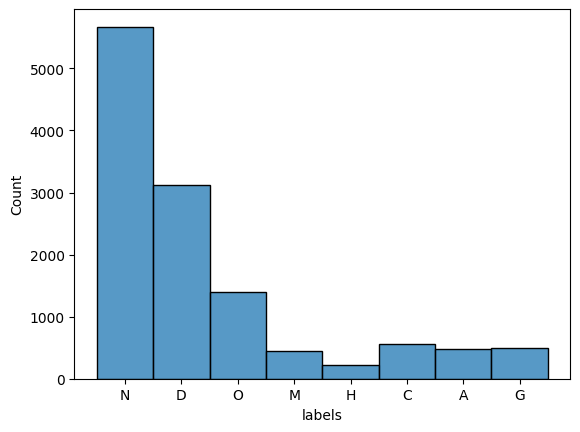

In [461]:
sns.histplot(data['labels'])

# Features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

data = pd.read_csv("./data.csv")

Images = []
for i in range(len(data)):
    Images.append(img.imread("../raw_data/ODIR-5K/ODIR-5K/Training Images/"+data.Fundus.iloc[i]))

In [481]:
def load_eye_data(loading_method):
    data_path = '../raw_data/ODIR-5K/ODIR-5K/Training Images/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    images_path = [elt for elt in os.listdir(data_path) if elt.find('.jpg')>0]
    for img in tqdm(images_path):
            path = os.path.join(data_path, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

0.4375